# BMI Lab 3: Spike Sorting with PCA

### EE 16B: Designing Information Devices and Systems II, Fall 2015 

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-

## Table of Contents

* [Introduction](#introduction)
* [Task 1: Two Neuron Spike Sorting](#task1)
* [Task 2: Three Neuron Spike Sorting](#task2)

<a id='introduction'></a>
# Introduction



In the first BMI lab, we saw that if we have (1) the spike timestamps from some neurons and (2) the corresponding joint angle of the subject, we can create a model to predict the joint angle of a subject from some more spike timestamps. These spike timestamps are gathered from electrodes, but the electrodes could be recording more than 1 neuron at the same time. To make predictions based on neuron firing rates, we need to be able to distinguish spikes that come from different neurons. 

Luckily for us, it is highly unlikely for two neurons next to each other to fire at precisely the same time, so in practice the "average" potential waveform looks like a sum of spike waveforms from different neurons. Additionally, each neuron has its own spike "signature" unique to that neuron. This is due to the physical characteristics of neurons, such as their shape and structure. It is impossible to know beforehand how many neurons an electrode measures or what each neuron's spike waveform looks like, so we must first separate the spikes from the different neurons near the electrode.

<a id='task1'></a>
##<span style="color:blue">Task 1: Two Neuron Spike Sorting</span>

A spike occurs when the potential passes a certain threshold in a neuron. In our data set, each recorded waveform contains `N=32` samples taken at a sampling frequency of 40kHz, which means the time difference between each consecutive sample is 800$\mu$s. We can represent each vector exactly with any 32-dimensional basis, as long as the vectors making up the basis are linearly independent. However, we want to compute a minimal set of basis vectors that brings out the features of the data using Principal Component Analysis (PCA).

For this lab, we will work with data from a single electrode which records the activity of up to 3 different neurons. We provide both training and test sets with two and three neurons. The two-neuron data set lets us visualize using a 2D scatter plot while the three-neuron data set requres a 3D scatter plots. The neurons have also been presorted using a professional software, so we can check our model against presorted data.

Import the data sets and see the average waveform for each presorted neuron by running the following cell.

In [2]:
%matplotlib inline
import numpy as np
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
presorted = {k: v for k, v in scipy.io.loadmat('spike_waveforms').items() \
             if k in ('sig118a_wf', 'sig118b_wf', 'sig118c_wf')}
presorted = [presorted['sig118a_wf'], presorted['sig118b_wf'], presorted['sig118c_wf']]

In [3]:
def _make_training_set(data):
    """ Separate data set into 2 sets. 
    1/6 of the dataset is training set and the rest is test set
    Parameter:
        data: waveform data (width = number of samples per spike)
    """
    n = data.shape[0]
    idx_training = np.random.choice(n, n//6, replace=False)
    training_set = data[idx_training]
    test_set = [data[i] for i in range(n) if n not in idx_training]
    return training_set, test_set

# Create training and testing dataset
two_neurons_training, two_neurons_test = _make_training_set(np.concatenate(presorted[1:]))
three_neurons_training, three_neurons_test = _make_training_set(np.concatenate(presorted))

Let's first see what the spikes look like. Below, we first plot 100 random spikes. Then, we plot the 3 distinct neuron's shape, taking the average over all of the samples gathered from that neuron based on the presorted data. The goal of this lab is to classify each of the line in the first plot to one of the neurons in the second plot.

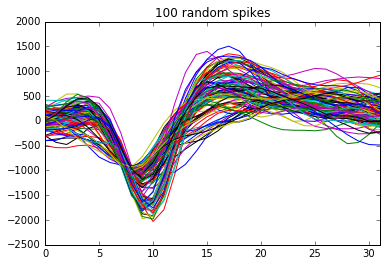

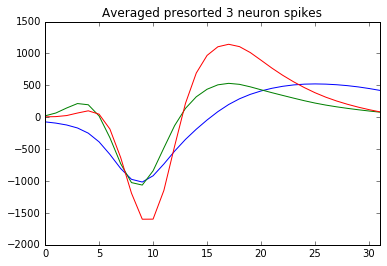

In [4]:
# Plot 100 random spikes
for waveforms in three_neurons_training[:100]:
    plt.plot(waveforms)
plt.xlim((0,31))
plt.title('100 random spikes')

# Plot the 3 spike shapes based on the presorted data
plt.figure()
for waveforms in presorted:
    plt.plot(np.mean(waveforms, axis=0))
plt.xlim((0,31))
plt.title('Averaged presorted 3 neuron spikes')

We can represent each spike in a lower dimensional space using PCA. In your implementation of PCA you will decide how to choose these components.

**<font color="red">Using PCA, what will be the principal components if we use data from an electrode that measures 2 neurons?** Describe a special property of the first principal component.

YOUR ANSWER HERE

**<font color="red">Using PCA, what will be the principal components if we use data from an electrode that measures 3 neurons?** Describe a special property of the first two principal components.

YOUR ANSWER HERE

You will be using <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html">np.linalg.svd</a> in your PCA function. Read the documentation for this function to figure out how to choose the principal components used as the basis for the lower dimensional space.

**<font color="red">What does SVD return and how will you use those results?**

YOUR ANSWER HERE

Complete the functions below to implement PCA training and classifying.

In [5]:
def PCA_train(training_set, n_components):
    """ Use np.linalg.svd to perform PCA
    Parameters:
        training_set: the data set to perform PCA on (MxN)
        n_components: the dimensionality of the basis to return (i.e. number of neurons)
    Returns: 
        The n_components principal components with highest significants and 
        the mean of each column of the original data
    Hint1: Subtract the mean of the data first so the average of each column is 0. The axis 
        parameter of np.mean is helpful here.
    Hint2: Find out a special property of the "s" returned by np.linalg.svd either by printing
        it out or reading the documentation.
    """    
    # YOUR CODE HERE #
    # YOUR CODE HERE #
    means = np.mean(training_set, axis=0)
    
    centered = training_set - means
    #print(centered)
    u, s, v = np.linalg.svd(centered)
    
    #print(s)
    #print(u.shape, v.shape)
    basis_components = v[0:n_components,]
    
    return basis_components, means

def PCA_classify(data, new_basis, mean):
    """ Project the data set, adjusted by the mean, into the new basis vectors
    Parameters:
        data: data to project (MxN)
        new_basis: new bases (KxN)
        mean: mean of each timestamp from PCA (list of length N)
    Returns: 
        Data projected onto new_basis (MxK)
    Hint: Don't forget to adjust the data with the PCA training mean!
    """
    # YOUR CODE HERE #
    centered = data - mean
    return centered.dot(new_basis.transpose())

First call `PCA_train` on `two_neurons_training` and plot the 2 principal components. Note that since the dataset is randomized, you might get different plots every time you run the second code cell of this notebook (the `_make_training_set` function).

In [6]:
# Perform PCA and plot the first 2 principal components.

# YOUR CODE HERE #
two_new_basis, two_mean = PCA_train(two_neurons_training, 2)

Now classify `two_neurons_test` using that model and produce a scatter plot in the new basis. We will also try classifying the presorted data containing 2 neurons so we can see how the model behaves on the 2 neurons.

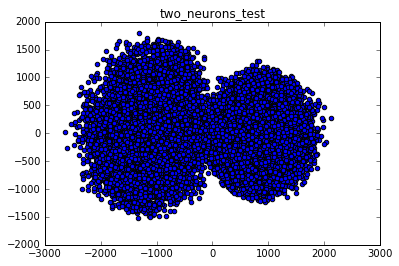

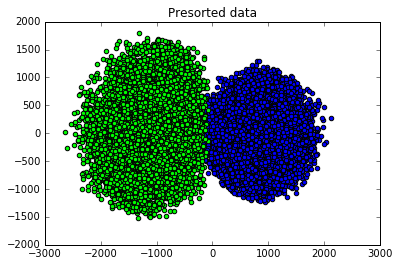

In [7]:
# Project the test data two_neurons_test to the basis you found earlier

# YOUR CODE HERE #
two_classified = PCA_classify(two_neurons_test, two_new_basis, two_mean)


plt.scatter(*two_classified.T)
plt.title('two_neurons_test')

# Project the presorted data and plot it
plt.figure()
presorted_two_classified = [PCA_classify(spikes, two_new_basis, two_mean) for spikes in presorted[1:]]
colors = ['#0000ff', '#00ff00']
for dat, color in zip(presorted_two_classified, colors):
    plt.scatter(*dat.T, c=color)
plt.title('Presorted data')

Note that the first principal component separates the two neurons in the $x$-axis. Thus, technically we only need 1 principal component to separate the two neurons. This is because the algorithm maximizes the square of the dot product of each signal with the principal component, which results in a large positive dot product with 1 neuron and a large negative dot product with the other.

<a id='task2'></a>
##<span style="color:blue">Task 2: Three Neuron Spike Sorting</span>

Now call `PCA_train` on `three_neurons_training` and plot the 3 principal components.

In [10]:
# Repeat training with three neuron data, producing 3 principal components

# YOUR CODE HERE #
three_new_basis, three_mean = PCA_train(three_neurons_training, 3)

Do the same classification process as the 2 neuron data, but now with the 3 neuron data. Compare your model's behavoir with that of the presorted data.

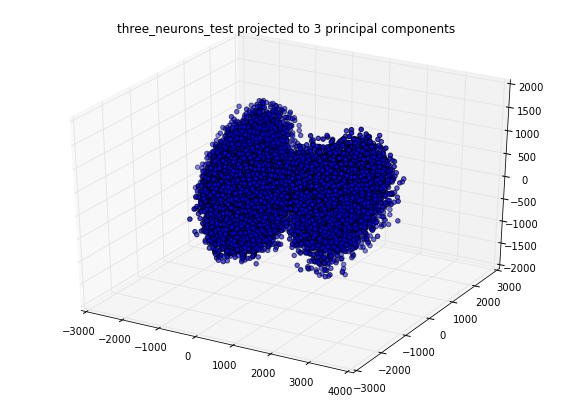

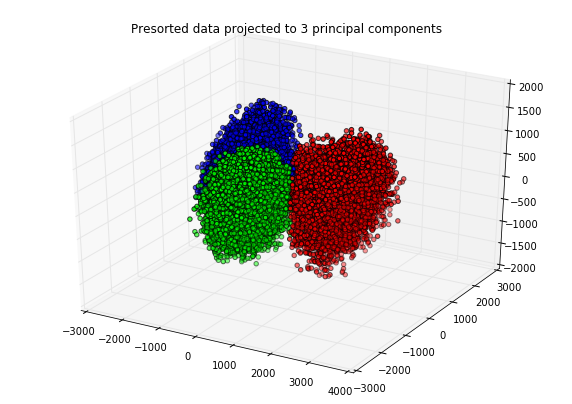

In [11]:
def plot_3D(data, view_from_top=False):
    """ Takes list of arrays (x, y, z) coordinate triples
    One array of triples per color
    """
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['#0000ff', '#00ff00', '#ff0000']
    for dat, color in zip(data, colors):
        Axes3D.scatter(ax, *dat.T, c=color)
    if view_from_top:
        ax.view_init(elev=90.,azim=0)                # Move perspective to view from top

# YOUR CODE HERE #
three_classified = PCA_classify(three_neurons_test, three_new_basis, three_mean)

plot_3D([three_classified], False)
plt.title('three_neurons_test projected to 3 principal components')

presorted_classified = [PCA_classify(spikes, three_new_basis, three_mean) for spikes in presorted]
plot_3D(np.array(presorted_classified), False)
plt.title('Presorted data projected to 3 principal components')

**<font color="red">How many principal components do you actually need to cluster the 3 neurons?** Change the second argument to the `plot_3D` function calls above to True to view the plots "from the top" (i.e. looking down the positive z axis).

YOUR ANSWER HERE

<a id='task3'></a>
##<span style="color:blue">Task 3: Determining Neurons</span>

Now that we have seperated the data into clusters, we can use k-means clustering to determine how many times each neuron fired. We can use this information to create a rough estimate for the average firing rate of each neuron over the time spanned by the given data.

Scipy just happens to have a function to compute k-means given clustered data, which we have conviently formated above. First, read the documentation for the function scipy.cluster.vq.kmeans <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html#scipy.cluster.vq.kmeans">here</a>.

**<font color="red">Based on the documentation for scipy.cluster.vq.kmeans, how will we be able to adjust our approach for the 2-neuron and 3-neuron data sets?**

YOUR ANSWER HERE

Need to know how many centroids (i.e. 2 or 3)

Now that we are familiar with how the function works, lets try to determine how many times each neuron fired in the 2-neuron data set. Start by determining the centroids of each cluster.

In [12]:
def find_centroids(clustered_data, num_of_clusters):
    """ Use scipy.cluster.vq.kmeans to determine centroids of clusters
    Parameters:
        clustered_data: the data projected onto the new basis
        num_of_clusters: the expected number of clusters in the data
    Returns: 
        The centroids of the clusters
    Hint 1: make sure to first 'whiten' the data (refer to docs)
    """
    whitened_data = scipy.cluster.vq.whiten(clustered_data)
    return scipy.cluster.vq.kmeans(whitened_data, num_of_clusters)[0]

Now, call find_centroids on the projected 2-neuron data.

The first centroid is at: [ 0.74368889 -0.09487869]
The second centroid is at: [-1.1344645   0.03316254]


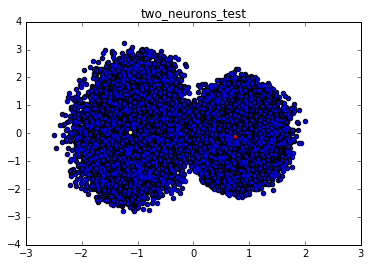

In [49]:
# Determine the centroids in the 2-neuron data

# YOUR CODE HERE #
centroid_list = find_centroids(two_classified, 2)

# Print the centroid locations
centroid1 = centroid_list[0, :]
centroid2 = centroid_list[1, :]

plt.scatter(*scipy.cluster.vq.whiten(two_classified).T)
plt.scatter(*centroid_list[0, :], c='#ff0000')
plt.scatter(*centroid_list[1, :], c='#ffff00')
plt.title('two_neurons_test')


print('The first centroid is at: ' + str(centroid1))
print('The second centroid is at: ' + str(centroid2))

One thing to note about the centroids we just found is that they have been normalized (by the "whiten" process), so they don't appear to match with the plot we made above. However, they should match the general location of the two clusters.

Now that we have the location of the clusters, we can determine which neuron fired for each data point. We will do this by determing the centroid closer to the data point in question

In [34]:
def which_neuron(data_point, centroid1, centroid2):
    """ Determine which centroid is closest to the data point
    Inputs:
        data_point: 1x2 array containing x/y coordinates of data point
        centroid1: 1x2 array containing x/y coordinates of centroid 1
        centroid1: 1x2 array containing x/y coordinates of centroid 1
    Returns: 
        The centroid closest to the data point
    """
    
    # YOUR CODE HERE
    distance_c1 = np.linalg.norm(data_point - centroid1)
    distance_c2 = np.linalg.norm(data_point - centroid2)
    
    return 0 if distance_c1 < distance_c2 else 1

Now apply this to the two_classified data set and count the number of times each neuron fired

Neuron 1 Fired 11627.0 times
Neuron 2 Fired 7730.0 times


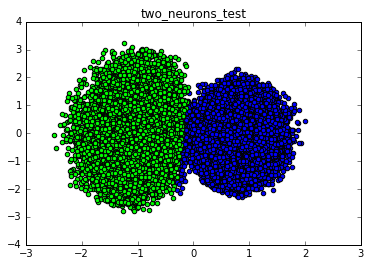

In [41]:
# Determine how many times neuron1 and neuron2 fired in the two_classifed data
# Hint: remember that we "whitened" the data to determine the cetroids

num_of_firings = np.zeros(2)

# YOUR CODE HERE
whitened_data = scipy.cluster.vq.whiten(two_classified)
centroids = find_centroids(two_classified, 2)

cluster0, cluster1 = [], []
for i in range(whitened_data.shape[0]):
    point = whitened_data[i, :]
    closest = which_neuron(point, centroids[0,:], centroids[1,:])
    num_of_firings[closest] += 1
    if closest == 0:
        cluster0.append(point)
    else:
        cluster1.append(point)


# Print the results
print('Neuron 1 Fired ' + str(num_of_firings[0]) + ' times')
print('Neuron 2 Fired ' + str(num_of_firings[1]) + ' times')

plt.scatter(*np.array(cluster0).T, c='#0000ff')
plt.scatter(*np.array(cluster1).T, c='#00ff00')
plt.title('two_neurons_test')



Now that we have determined how many times each neuron fired over all of our data collections, we can use this to construct an "average firing rate"

In [42]:
# Compute the average firing rate

total_time = 32*800E-6*len(two_neurons_test)
print('Average firing rate of Neuron 1: ' + str(num_of_firings[0]/total_time) + ' times per second')
print('Average firing rate of Neuron 2: ' + str(num_of_firings[1]/total_time) + ' times per second')

Average firing rate of Neuron 1: 23.4633304489 times per second
Average firing rate of Neuron 2: 15.5991695511 times per second


Recall that the first lab used neuron firing rate to help compute the angle of the arm. This lab demonstrated how we can go from the raw data collected from electrodes physically connected to a subject to data that is ready to be processed in the fashion of Lab 1.

The point of the BMI labs was to demonstrate how we can collect, proceess, and use data to make assumptions about the original human (or animal) subject. This is just a starting point - there are limitless ways to use the end results to create systems that 